In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

KeyboardInterrupt: ignored

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-ind is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

(430, 690, 3)
NIK 1 34711402017410001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin » LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW :001 024

KelDesa : WEDOMARTANI
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Perkawinan: KAWIN
Pekerjaan : PEDAGANG

Kewarganegaraan: WNI
Berlaku Hingga :02-09-2017



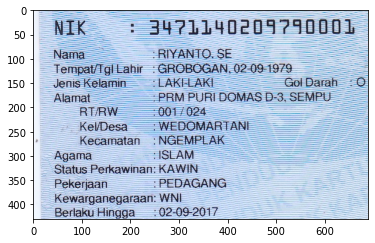

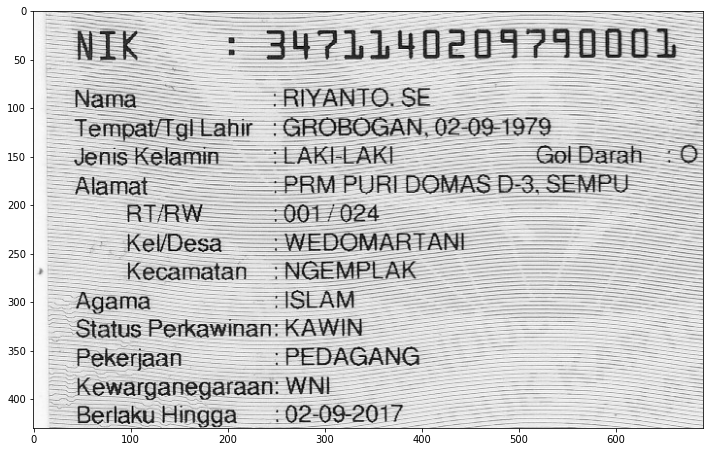

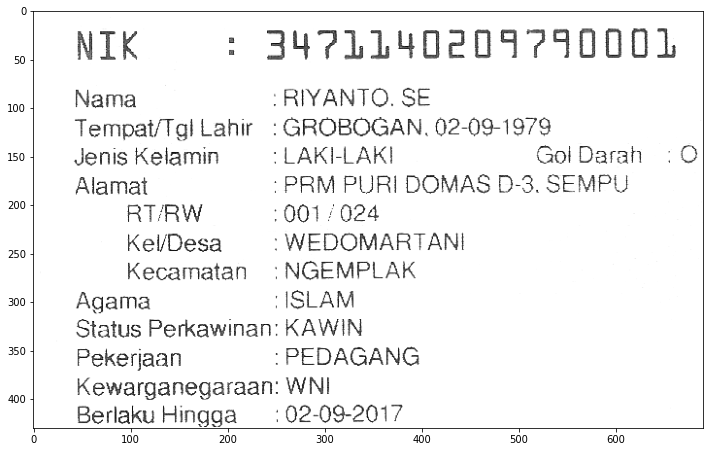

In [ ]:
img = cv2.imread("/content/drive/MyDrive/ktp/ktp.png")[120:550, 10:700]
print(img.shape)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(gray)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
display(threshed)
results = pytesseract.image_to_data(threshed, lang="ind",output_type='data.frame')
result = pytesseract.image_to_string(threshed, lang="ind")
print(result)

In [ ]:
for word in result.split("\n"):
  if "”—" in word:
    word = word.replace("”—", ":")
  
  #normalize NIK
  if "NIK" in word:
    nik_char = word.split()
    if "D" in word:
      word = word.replace("D", "0")
    if "?" in word:
      word = word.replace("?", "7") 
  
  print(word.split('\n'))

['NIK 1 34711402017410001']
['']
['Nama :RIYANTO. SE']
['']
['Tempat/Tgl Lahir : GROBOGAN. 02-09-1979']
['']
['Jenis Kelamin » LAKI-LAKI Gol Darah : 0']
['']
['Alamat PRM PURI DOMAS D-3. SEMPU']
['RTRW :001 024']
['']
['KelDesa : WEDOMARTANI']
['Kecamatan : NGEMPLAK']
['']
['Agama "ISLAM']
['Status Perkawinan: KAWIN']
['Pekerjaan : PEDAGANG']
['']
['Kewarganegaraan: WNI']
['Berlaku Hingga :02-09-2017']
['\x0c']


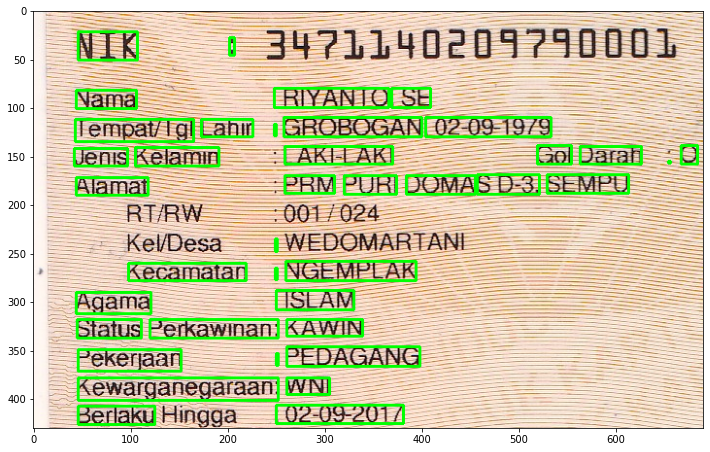

In [ ]:
n_boxes = len(results['text'])
for i in range(n_boxes):
    if int(results['conf'][i]) > 60:
        (x, y, w, h) = (results['left'][i], results['top'][i], results['width'][i], results['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)